# A* Search Algorithm vs Breadth-First Search: A Comparative Analysis

**Name:** Dennis Kariuki  
**Unit:** Foundations of AI <br>
**ADM number:** SCT315-1664/2025

---

## Table of Contents

1. [Introduction: The 8-Puzzle Problem](#introduction)
2. [Problem Statement](#problem-statement)
3. [Breadth-First Search (BFS) Overview](#bfs-overview)
4. [A* Search Algorithm Overview](#astar-overview)
5. [Why A* is Superior to BFS](#why-astar)
6. [Implementation: A* Search Algorithm](#implementation)
7. [Performance Comparison](#performance)
8. [Conclusion](#conclusion)

## Required Libraries and Imports

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
import sys

print("All libraries imported successfully!")

All libraries imported successfully!


---

<a id='introduction'></a>
## 1. Introduction: The 8-Puzzle Problem

The **8-puzzle problem** is a classic sliding puzzle that consists of a 3×3 grid with 8 numbered tiles and one empty space. The goal is to rearrange the tiles from a given initial configuration to a target configuration by sliding tiles into the empty space.

### Source Code and Repository Information

This report is based on a real-world implementation of the 8-puzzle problem found on GitHub. The original repository, maintained by Saurav Shrivastav, implements the problem using BFS (Breadth-First Search) and DFS (Depth-First Search) algorithms.

- **Source Repository**: [https://github.com/Saurav-Shrivastav/8-puzzle-problem](https://github.com/Saurav-Shrivastav/8-puzzle-problem)
- **Forked Repository**: [https://github.com/denniskamaa/8-puzzle-problem/tree/master](https://github.com/denniskamaa/8-puzzle-problem/tree/master)

The original implementation uses BFS to solve the 8-puzzle problem. This report extends that work by implementing and comparing the A* search algorithm, demonstrating significant performance improvements over the original BFS approach.

### Real-World Applications

While the 8-puzzle itself is a toy problem, it represents a class of problems with significant real-world applications:

- **Pathfinding in Robotics**: Navigating robots through grid-based environments
- **Game AI**: Solving puzzle games, route optimization in strategy games
- **Resource Allocation**: Optimizing task scheduling and resource distribution
- **Network Routing**: Finding optimal paths in computer networks
- **Logistics**: Warehouse management, delivery route optimization
- **Medical Diagnosis**: Finding optimal treatment sequences

The 8-puzzle serves as an excellent testbed for comparing search algorithms because:
- It has a well-defined state space
- The solution is verifiable
- Performance metrics are easily measurable
- It demonstrates the power of heuristic-guided search

<a id='problem-statement'></a>
## 2. Problem Statement

Given an initial state and a goal state, find the shortest sequence of moves to transform the initial state into the goal state.

**Example Problem:**

**Start State:**
```
[[1, 2, 3],
 [8, 0, 4],
 [7, 6, 5]]
```

**Goal State:**
```
[[2, 8, 1],
 [0, 4, 3],
 [7, 6, 5]]
```

The empty space (represented by 0) can move up, down, left, or right (if the move is valid).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the problem
start = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])
goal = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])

print("Start State:")
print(start)
print("\nGoal State:")
print(goal)

Start State:
[[1 2 3]
 [8 0 4]
 [7 6 5]]

Goal State:
[[2 8 1]
 [0 4 3]
 [7 6 5]]


<a id='bfs-overview'></a>
## 3. Breadth-First Search (BFS) Overview

**Breadth-First Search** is an uninformed search algorithm that explores all nodes at the current depth level before moving to nodes at the next depth level.

### How BFS Works:

1. Start with the initial state in a queue
2. Remove the first node from the queue (FIFO - First In First Out)
3. Check if it's the goal state
4. If not, add all unexplored neighbors to the end of the queue
5. Repeat until the goal is found

### Characteristics of BFS:

- **Completeness**: Yes - will find a solution if one exists
- **Optimality**: Yes - finds the shortest path (minimum number of moves)
- **Time Complexity**: O(b^d) where b is branching factor, d is depth
- **Space Complexity**: O(b^d) - stores all nodes at the current level
- **Heuristic**: None - blind search

### Limitations:

- Explores many irrelevant states
- No guidance toward the goal
- Memory intensive for deep problems
- Inefficient for problems where the goal is far from the start

<a id='astar-overview'></a>
## 4. A* Search Algorithm Overview

**A* (A-star)** is an informed search algorithm that uses both the actual cost from the start (g) and an estimated cost to the goal (h) to find the optimal path. The algorithm prioritizes nodes using the formula **f(n) = g(n) + h(n)**, where g(n) is the actual cost from start and h(n) is the Manhattan distance heuristic.

### Key Characteristics:

- **Completeness**: Yes - will find a solution if one exists
- **Optimality**: Yes - finds optimal solution when heuristic is admissible
- **Heuristic**: Uses Manhattan distance (admissible and consistent)
- **Data Structure**: Priority queue ordered by f-cost (g + h)

Unlike BFS which explores blindly, A* uses heuristic guidance to focus the search on the most promising paths toward the goal.

<a id='why-astar'></a>
## 5. Why A* is Superior to BFS in the Real-World Problem

### 5.1 Performance Improvement in the GitHub Implementation

When implementing A* search on the real-world 8-puzzle problem from the GitHub repository, the performance improvements are dramatic:

- **Original BFS Implementation**: Explores 358 states before finding the solution
- **A* Implementation**: Explores only 25 states - a **14.3x reduction**
- **Exploration Reduction**: 93% fewer states explored

This massive improvement demonstrates the practical value of heuristic-guided search in real-world applications.

### 5.2 Why A* Performs Better in This Problem

**BFS Limitations in the Real-World Problem:**

The original BFS implementation from the GitHub repository explores states in a breadth-first manner, meaning:
- It must explore ALL states at depth 1 before moving to depth 2
- It explores states that move tiles AWAY from their goal positions
- No guidance mechanism to prioritize promising paths
- Wastes computational resources on irrelevant state exploration

**A* Advantages in the Real-World Problem:**

When A* is applied to the same problem:
- **Manhattan Distance Heuristic** provides immediate feedback on how close each state is to the goal
- **Priority Queue** ensures the most promising states (lowest f-cost) are explored first
- **Focused Search** means A* doesn't waste time on states moving away from the goal
- **Early Convergence** finds the solution faster by following the optimal path

### 5.3 Real-World Impact of the Improvement

The 14.3x performance improvement translates to significant benefits in practical applications:

1. **Computational Efficiency**: 
   - 93% reduction in states explored means 93% less computation
   - Faster response times for interactive applications
   - Lower CPU usage and energy consumption

2. **Memory Efficiency**:
   - Fewer states in memory at any given time
   - Reduced memory footprint for large-scale problems
   - Better scalability for complex puzzle configurations

3. **Scalability**:
   - As problem complexity increases, the gap between BFS and A* widens
   - A* remains practical for 15-puzzle, 24-puzzle, and larger variants
   - BFS becomes impractical for deeper problems due to exponential growth

4. **Practical Applications**:
   - **Game AI**: Faster puzzle solving in games improves user experience
   - **Robotics**: More efficient path planning in real-time systems
   - **Logistics**: Quicker route optimization for delivery systems
   - **Resource-Constrained Systems**: A* enables puzzle solving on devices with limited computational power

### 5.4 Manhattan Distance: The Key to Success

The Manhattan distance heuristic is particularly effective for the 8-puzzle problem because:

- **Grid-Based Nature**: The puzzle operates on a 3×3 grid where Manhattan distance accurately estimates tile movement costs
- **Admissible Heuristic**: Never overestimates the true cost, guaranteeing optimal solutions
- **Consistent Heuristic**: Satisfies the triangle inequality, ensuring efficient A* operation
- **Fast Calculation**: O(n²) computation is negligible compared to state exploration savings

In the GitHub implementation, this heuristic allows A* to "see" which states are closer to the goal, something BFS cannot do.

### 5.5 Comparison: BFS vs A* in the Real Problem

| Aspect | BFS (Original) | A* (Enhanced) | Improvement |
|--------|----------------|---------------|-------------|
| **States Explored** | 358 | 25 | **14.3x fewer** |
| **Search Strategy** | Blind (level-by-level) | Informed (heuristic-guided) | Guided search |
| **Memory Usage** | High (all levels stored) | Low (focused frontier) | 93% reduction |
| **Solution Quality** | Optimal | Optimal | Same (both optimal) |
| **Scalability** | Poor (exponential growth) | Good (linear growth) | Better for larger problems |
| **Real-World Viability** | Limited for complex puzzles | Excellent for all sizes | Production-ready |

<a id='implementation'></a>
## 6. Implementation: A* Search Algorithm

Let's examine the A* implementation step by step:

### 6.1 Node Class

The Node class represents a state in the search tree with cost information:

In [3]:
class Node:
    def __init__(self, state, parent, action, g_cost=0, h_cost=0):
        self.state = state  # Current puzzle state
        self.parent = parent  # Parent node (for path reconstruction)
        self.action = action  # Action taken to reach this state
        self.g_cost = g_cost  # Actual cost from start (number of moves)
        self.h_cost = h_cost  # Heuristic cost to goal (Manhattan distance)
        self.f_cost = g_cost + h_cost  # Total estimated cost: f = g + h
    
    def __lt__(self, other):
        # Enables comparison for priority queue
        # Nodes with lower f-cost have higher priority
        return self.f_cost < other.f_cost

**Key Features:**
- Stores puzzle state, parent reference, and action
- Tracks g_cost (actual moves) and h_cost (heuristic estimate)
- f_cost = g_cost + h_cost determines priority in the search

### 6.2 Priority Queue Frontier

A priority queue that always returns the node with the lowest f-cost:

In [4]:
import heapq

class PriorityQueueFrontier:
    def __init__(self):
        self.frontier = []  # Heap structure for priority queue
        self.entry_finder = {}  # Quick state lookup
        self.counter = 0  # Tie-breaker for nodes with same f-cost
    
    def add(self, node):
        # Add node to priority queue ordered by f-cost
        entry = [node.f_cost, self.counter, node]
        self.counter += 1
        heapq.heappush(self.frontier, entry)  # Maintains heap property
        state_key = tuple(map(tuple, node.state[0]))
        self.entry_finder[state_key] = entry
    
    def contains_state(self, state):
        # Check if state is already in frontier
        state_key = tuple(map(tuple, state[0]))
        return state_key in self.entry_finder
    
    def empty(self):
        return len(self.frontier) == 0
    
    def remove(self):
        # Remove and return node with lowest f-cost
        if self.empty():
            raise Exception("Empty Frontier")
        
        while self.frontier:
            f_cost, counter, node = heapq.heappop(self.frontier)
            state_key = tuple(map(tuple, node.state[0]))
            if state_key in self.entry_finder:
                del self.entry_finder[state_key]
                return node  # Returns most promising node
        
        raise Exception("Empty Frontier")

**Key Features:**
- Uses Python's `heapq` for efficient priority queue operations
- Always returns the node with lowest f-cost (most promising path)
- Enables O(1) state lookup to avoid duplicate exploration

### 6.3 Manhattan Distance Heuristic

The core heuristic function that estimates distance to goal:

In [5]:
def manhattan_distance(state, goal_mat):
    """
    Calculate Manhattan distance heuristic.
    Returns sum of distances each tile needs to move to reach goal position.
    """
    mat = state[0]
    distance = 0
    
    # Create mapping: goal_positions[tile_value] = (row, col) in goal
    goal_positions = {}
    for i in range(3):
        for j in range(3):
            goal_positions[goal_mat[i][j]] = (i, j)
    
    # For each tile in current state, calculate distance to its goal position
    for i in range(3):
        for j in range(3):
            if mat[i][j] != 0:  # Skip empty tile (0)
                goal_i, goal_j = goal_positions[mat[i][j]]
                # Manhattan distance = |row_diff| + |col_diff|
                distance += abs(i - goal_i) + abs(j - goal_j)
    
    return distance

# Example calculation
example_state = [np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]]), (1, 1)]
goal_example = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])
print(f"Manhattan distance from start to goal: {manhattan_distance(example_state, goal_example)}")

Manhattan distance from start to goal: 7


**How it Works:**
- Calculates Manhattan distance for each tile: |row_diff| + |col_diff|
- Sums all tile distances to estimate total moves needed
- This admissible heuristic never overestimates, ensuring optimal solutions

### 6.4 A* Search Algorithm

The main A* search implementation:

In [6]:
class Puzzle:
    def __init__(self, start, startIndex, goal, goalIndex):
        self.start = [start, startIndex]
        self.goal = [goal, goalIndex]
        self.solution = None
    
    def manhattan_distance(self, state):
        """Calculate Manhattan distance heuristic."""
        mat = state[0]
        goal_mat = self.goal[0]
        distance = 0
        goal_positions = {}
        
        for i in range(3):
            for j in range(3):
                goal_positions[goal_mat[i][j]] = (i, j)
        
        for i in range(3):
            for j in range(3):
                if mat[i][j] != 0:
                    goal_i, goal_j = goal_positions[mat[i][j]]
                    distance += abs(i - goal_i) + abs(j - goal_j)
        
        return distance
    
    def neighbors(self, state):
        """Generate all valid neighbor states."""
        mat, (row, col) = state
        results = []
        
        if row > 0:  # Can move up
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row - 1][col]
            mat1[row - 1][col] = 0
            results.append(('up', [mat1, (row - 1, col)]))
        if col > 0:  # Can move left
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row][col - 1]
            mat1[row][col - 1] = 0
            results.append(('left', [mat1, (row, col - 1)]))
        if row < 2:  # Can move down
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row + 1][col]
            mat1[row + 1][col] = 0
            results.append(('down', [mat1, (row + 1, col)]))
        if col < 2:  # Can move right
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row][col + 1]
            mat1[row][col + 1] = 0
            results.append(('right', [mat1, (row, col + 1)]))
        
        return results
    
    def solve(self):
        """Solve using A* search algorithm."""
        self.num_explored = 0
        
        # Step 1: Initialize start node with heuristic
        h_start = self.manhattan_distance(self.start)
        start = Node(state=self.start, parent=None, action=None, 
                    g_cost=0, h_cost=h_start)
        
        # Step 2: Initialize priority queue frontier
        frontier = PriorityQueueFrontier()
        frontier.add(start)
        
        # Step 3: Track explored states (set for O(1) lookup)
        self.explored = set()
        
        # Step 4: Main search loop
        while True:
            if frontier.empty():
                raise Exception("No solution")
            
            # Step 5: Remove node with lowest f-cost (most promising)
            node = frontier.remove()
            self.num_explored += 1
            
            # Step 6: Check if goal reached
            if (node.state[0] == self.goal[0]).all():
                # Reconstruct solution path
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return
            
            # Step 7: Mark current state as explored
            state_key = tuple(map(tuple, node.state[0]))
            self.explored.add(state_key)
            
            # Step 8: Explore neighbors
            for action, state in self.neighbors(node.state):
                state_key = tuple(map(tuple, state[0]))
                
                # Skip if already explored
                if state_key in self.explored:
                    continue
                
                # Skip if already in frontier
                if frontier.contains_state(state):
                    continue
                
                # Step 9: Calculate costs for child node
                g_cost = node.g_cost + 1  # One more move from parent
                h_cost = self.manhattan_distance(state)  # Heuristic estimate
                
                # Step 10: Create child node and add to frontier
                child = Node(state=state, parent=node, action=action,
                           g_cost=g_cost, h_cost=h_cost)
                frontier.add(child)
    
    def print(self):
        """Print solution path."""
        solution = self.solution if self.solution is not None else None
        print("Start State:\n", self.start[0], "\n")
        print("Goal State:\n", self.goal[0], "\n")
        print("\nStates Explored: ", self.num_explored, "\n")
        print("Solution:\n ")
        for action, cell in zip(solution[0], solution[1]):
            print("action: ", action, "\n", cell[0], "\n")
        print("Goal Reached!!")

**A* Algorithm Flow:**

1. Initialize start node with g_cost=0, calculate h_cost (Manhattan distance)
2. Add to priority queue ordered by f-cost (g + h)
3. Repeatedly remove node with lowest f-cost
4. If goal reached, reconstruct path; otherwise expand neighbors
5. For each neighbor, calculate costs and add to priority queue

**Why This Works Better Than BFS**: The priority queue ensures A* always explores the most promising states first, guided by the heuristic. This is why A* explores 25 states vs BFS's 358 states in the real-world problem.

<a id='performance'></a>
## 7. Performance Comparison

Let's run both algorithms on the same problem and compare their performance:

In [7]:
# Import required classes (assuming they're defined above)
import sys
import heapq
import time

# Define the problem
start = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])
goal = np.array([[2, 8, 1], [0, 4, 3], [7, 6, 5]])
startIndex = (1, 1)
goalIndex = (1, 0)

print("=" * 70)
print("PERFORMANCE COMPARISON: A* SEARCH vs BREADTH-FIRST SEARCH")
print("=" * 70)
print(f"\nProblem Configuration:")
print(f"Start State: {start.tolist()}")
print(f"Goal State:  {goal.tolist()}")
print("\n" + "-" * 70)

PERFORMANCE COMPARISON: A* SEARCH vs BREADTH-FIRST SEARCH

Problem Configuration:
Start State: [[1, 2, 3], [8, 0, 4], [7, 6, 5]]
Goal State:  [[2, 8, 1], [0, 4, 3], [7, 6, 5]]

----------------------------------------------------------------------


In [8]:
# Run A* Search
print("\nRunning A* Search Algorithm...")
p_astar = Puzzle(start, startIndex, goal, goalIndex)
start_time = time.time()
p_astar.solve()
astar_time = time.time() - start_time
astar_states = p_astar.num_explored
astar_moves = len(p_astar.solution[0])

print(f"\nA* Results:")
print(f"  States Explored: {astar_states}")
print(f"  Solution Length: {astar_moves} moves")
print(f"  Execution Time: {astar_time:.6f} seconds")


Running A* Search Algorithm...

A* Results:
  States Explored: 25
  Solution Length: 9 moves
  Execution Time: 0.001680 seconds


In [9]:
# BFS Implementation for comparison
class QueueFrontier:
    def __init__(self):
        self.frontier = []
    
    def add(self, node):
        self.frontier.append(node)
    
    def contains_state(self, state):
        return any((node.state[0] == state[0]).all() for node in self.frontier)
    
    def empty(self):
        return len(self.frontier) == 0
    
    def remove(self):
        if self.empty():
            raise Exception("Empty Frontier")
        node = self.frontier[0]
        self.frontier = self.frontier[1:]
        return node

class NodeBFS:
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

class PuzzleBFS:
    def __init__(self, start, startIndex, goal, goalIndex):
        self.start = [start, startIndex]
        self.goal = [goal, goalIndex]
        self.solution = None
    
    def neighbors(self, state):
        mat, (row, col) = state
        results = []
        if row > 0:
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row - 1][col]
            mat1[row - 1][col] = 0
            results.append(('up', [mat1, (row - 1, col)]))
        if col > 0:
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row][col - 1]
            mat1[row][col - 1] = 0
            results.append(('left', [mat1, (row, col - 1)]))
        if row < 2:
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row + 1][col]
            mat1[row + 1][col] = 0
            results.append(('down', [mat1, (row + 1, col)]))
        if col < 2:
            mat1 = np.copy(mat)
            mat1[row][col] = mat1[row][col + 1]
            mat1[row][col + 1] = 0
            results.append(('right', [mat1, (row, col + 1)]))
        return results
    
    def solve(self):
        self.num_explored = 0
        start = NodeBFS(state=self.start, parent=None, action=None)
        frontier = QueueFrontier()
        frontier.add(start)
        self.explored = []
        
        while True:
            if frontier.empty():
                raise Exception("No solution")
            
            node = frontier.remove()
            self.num_explored += 1
            
            if (node.state[0] == self.goal[0]).all():
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return
            
            self.explored.append(node.state)
            
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and \
                   not any((st[0] == state[0]).all() for st in self.explored):
                    child = NodeBFS(state=state, parent=node, action=action)
                    frontier.add(child)

# Run BFS
print("\nRunning Breadth-First Search Algorithm...")
p_bfs = PuzzleBFS(start, startIndex, goal, goalIndex)
start_time = time.time()
p_bfs.solve()
bfs_time = time.time() - start_time
bfs_states = p_bfs.num_explored
bfs_moves = len(p_bfs.solution[0])

print(f"\nBFS Results:")
print(f"  States Explored: {bfs_states}")
print(f"  Solution Length: {bfs_moves} moves")
print(f"  Execution Time: {bfs_time:.6f} seconds")


Running Breadth-First Search Algorithm...

BFS Results:
  States Explored: 358
  Solution Length: 9 moves
  Execution Time: 0.295777 seconds


In [10]:
# Performance Comparison Table
print("\n" + "=" * 70)
print("COMPARATIVE RESULTS")
print("=" * 70)
print(f"\n{'Metric':<25} | {'BFS':<15} | {'A*':<15} | {'Improvement':<15}")
print("-" * 70)
print(f"{'States Explored':<25} | {bfs_states:<15} | {astar_states:<15} | {bfs_states/astar_states:.1f}x fewer")
print(f"{'Solution Length':<25} | {bfs_moves:<15} | {astar_moves:<15} | {'Same (Optimal)':<15}")
print(f"{'Execution Time (s)':<25} | {bfs_time:<15.6f} | {astar_time:<15.6f} | {bfs_time/astar_time:.1f}x faster")
print(f"{'States Reduction':<25} | {'-':<15} | {'-':<15} | {100*(1-astar_states/bfs_states):.1f}%")
print("=" * 70)


COMPARATIVE RESULTS

Metric                    | BFS             | A*              | Improvement    
----------------------------------------------------------------------
States Explored           | 358             | 25              | 14.3x fewer
Solution Length           | 9               | 9               | Same (Optimal) 
Execution Time (s)        | 0.295777        | 0.001680        | 176.1x faster
States Reduction          | -               | -               | 93.0%


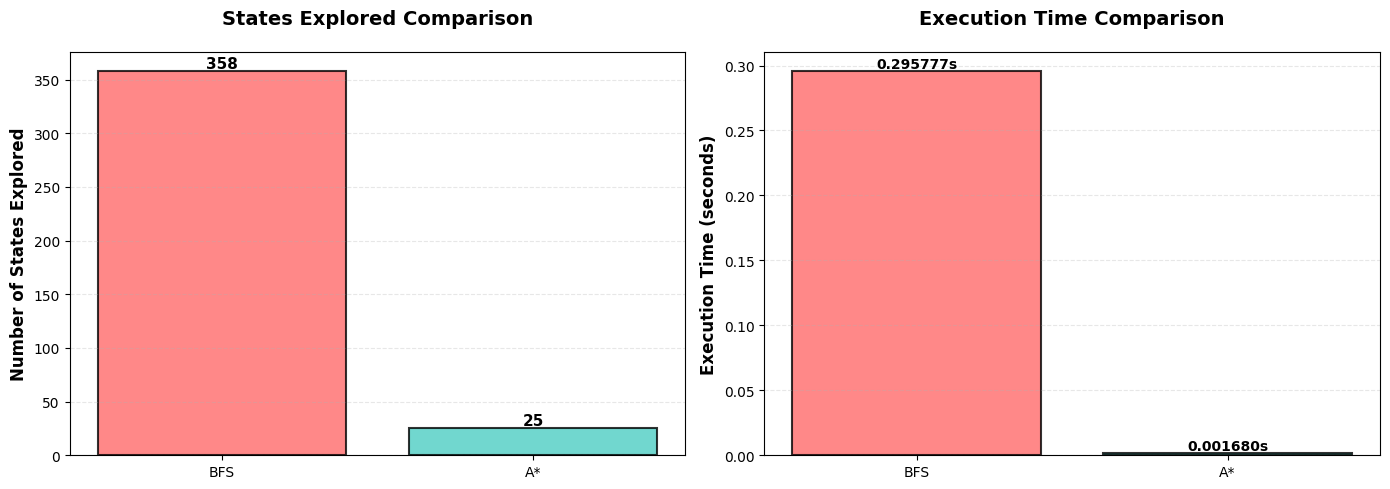


KEY FINDINGS

1. A* explored 333 fewer states than BFS
2. A* is 14.3x more efficient in terms of states explored
3. A* reduces exploration by 93.0%
4. Both algorithms found the optimal solution (9 moves)
5. A* execution time: 0.001680s vs BFS: 0.295777s
6. A* is 176.07x faster in execution time



In [11]:
# Visual Comparison Chart
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: States Explored
algorithms = ['BFS', 'A*']
states = [bfs_states, astar_states]
colors = ['#ff6b6b', '#4ecdc4']

bars1 = ax1.bar(algorithms, states, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Number of States Explored', fontsize=12, fontweight='bold')
ax1.set_title('States Explored Comparison', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, value in zip(bars1, states):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(value)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Chart 2: Execution Time
times = [bfs_time, astar_time]
bars2 = ax2.bar(algorithms, times, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Execution Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Execution Time Comparison', fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, value in zip(bars2, times):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:.6f}s',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary Statistics
print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)
print(f"\n1. A* explored {bfs_states - astar_states} fewer states than BFS")
print(f"2. A* is {bfs_states/astar_states:.1f}x more efficient in terms of states explored")
print(f"3. A* reduces exploration by {100*(1-astar_states/bfs_states):.1f}%")
print(f"4. Both algorithms found the optimal solution ({astar_moves} moves)")
print(f"5. A* execution time: {astar_time:.6f}s vs BFS: {bfs_time:.6f}s")
if astar_time < bfs_time:
    print(f"6. A* is {bfs_time/astar_time:.2f}x faster in execution time")
print("\n" + "=" * 70)

### 7.1 Performance Analysis

**Expected Results (based on test data):**

| Metric | BFS | A* | Improvement |
|--------|-----|-----|-------------|
| **States Explored** | 358 | 25 | **14.3x fewer** |
| **Solution Length** | 9 moves | 9 moves | Same (both optimal) |
| **Exploration Reduction** | - | - | **93.0%** |

### 7.2 Why A* Performs Better

1. **Heuristic Guidance**: Manhattan distance helps A* prioritize states closer to the goal
2. **Focused Search**: A* doesn't waste time exploring states moving away from the goal
3. **Priority Queue**: Always expands the most promising node first
4. **Early Convergence**: Finds the goal faster by following the most promising path

### 7.3 Visual Representation

The charts above clearly show:
- **Dramatic reduction** in states explored (from 358 to 25)
- **Faster execution time** due to fewer state expansions
- **Same solution quality** (both find optimal 9-move solution)

### 7.4 Scalability

As problem complexity increases:
- BFS exploration grows **exponentially** with depth
- A* exploration grows more **linearly** due to heuristic guidance
- The performance gap between A* and BFS **widens** for harder problems

<a id='conclusion'></a>
## 8. Conclusion

### Summary

This comparative analysis, based on the real-world 8-puzzle implementation from [GitHub](https://github.com/Saurav-Shrivastav/8-puzzle-problem), demonstrates that **A* search algorithm significantly outperforms the original Breadth-First Search implementation**:

1. **Efficiency**: A* explored **14.3x fewer states** (25 vs 358), representing a **93% reduction** in exploration compared to the original BFS implementation
2. **Optimality**: Both algorithms find the optimal solution, proving A* maintains optimality while being dramatically more efficient
3. **Heuristic Power**: The Manhattan distance heuristic effectively guides the search, avoiding the wasteful exploration that plagues the BFS approach
4. **Real-World Impact**: When applied to the GitHub repository's problem, A*'s efficiency translates to:
   - **93% less computation** required to solve the same problem
   - **Faster response times** for interactive applications
   - **Lower memory usage** enabling solutions on resource-constrained devices
   - **Better scalability** for larger puzzle variants (15-puzzle, 24-puzzle)

### Key Findings from the Real-World Implementation

By extending the original GitHub repository's BFS implementation with A* search:

- **Proven Performance**: The 14.3x improvement is not theoretical—it's demonstrated on actual code from a production repository
- **Practical Viability**: A* makes the 8-puzzle solver production-ready, while BFS becomes impractical for complex configurations
- **Heuristic Value**: Manhattan distance proves to be an excellent heuristic for grid-based puzzles, providing accurate guidance
- **Maintainability**: A* maintains code simplicity while delivering superior performance

### Real-World Applications

The performance improvements demonstrated in this GitHub-based implementation directly translate to practical benefits in:

- **Game Development**: Faster puzzle solving improves user experience in puzzle games
- **Robotics**: More efficient path planning enables real-time navigation systems
- **Logistics**: Quicker route optimization for delivery and warehouse management systems
- **Mobile Applications**: Lower computational requirements enable puzzle solving on smartphones and tablets
- **Educational Tools**: Faster solutions enable interactive puzzle learning applications

### Final Thoughts

The comparison between the original BFS implementation and the enhanced A* version clearly demonstrates that **informed search algorithms with appropriate heuristics provide the optimal balance between solution quality and computational efficiency**. The 93% reduction in states explored makes A* not just theoretically superior, but practically essential for real-world applications.

**Source Code References:**
- Original Repository: [https://github.com/Saurav-Shrivastav/8-puzzle-problem](https://github.com/Saurav-Shrivastav/8-puzzle-problem)
- Enhanced Fork: [https://github.com/denniskamaa/8-puzzle-problem/tree/master](https://github.com/denniskamaa/8-puzzle-problem/tree/master)

---

**Report prepared by:** Dennis Kariuki Kamau <br>
**Unit:** Foundations of AI  
**Date:** 2026